# Assignment
Problem: Experimenting with Regression using housing data

Dataset : California Housing Dataset

ML Model: Linear Regression

Performance: Root Mean Squared Error of 0.7

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [18]:
housing_data = datasets.fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)

In [19]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
df.shape

(20640, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [22]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [23]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [24]:
target_df = pd.DataFrame(housing_data.target, columns = ['Target'])
target_df.head()

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = housing_data.feature_names)
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


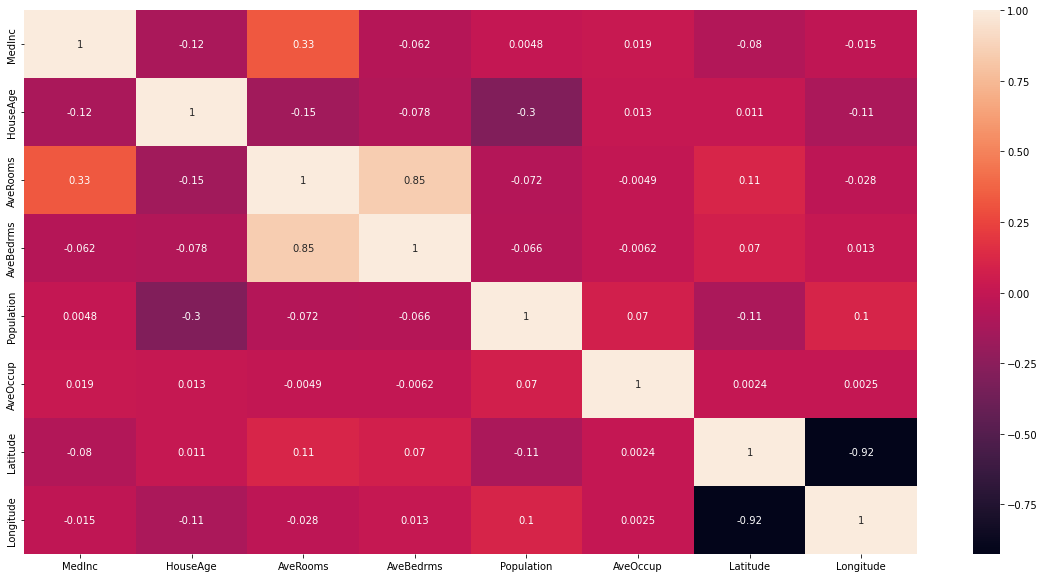

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled, target_df, test_size = 0.2, random_state = 42)

Model Building

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

print("r2_score is : ", r2_score(y_test, y_pred))
print("rmse is : ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score is :  0.575787706032451
rmse is :  0.7455813830127762
